In [3]:
import pytesseract
import requests
from PIL import Image
from PIL import ImageFilter
import cv2
import numpy as np
import textblob as tb
import matplotlib.pyplot as plt

In [2]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

### Write a function to Highlight table grid on the Image and change its color to crimson and return modified image.

In [204]:
image=cv2.imread("1.jpg")
def table(image):
    scale_percent = 20 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA)
    overlay=resized.copy()
    output=resized.copy()
    cv2.rectangle(overlay,(38,240),(480,408),(0,0,153),2)
    cv2.line(overlay,(99,240),(99,407),(0,0,153),2)
    cv2.line(overlay,(260,240),(260,407),(0,0,153),2)
    cv2.line(overlay,(330,240),(330,407),(0,0,153),2)
    cv2.line(overlay,(395,240),(395,407),(0,0,153),2)

    return cv2.addWeighted(overlay,0.6,output,0.4,0,output)
    

In [205]:
cv2.imshow("i",table(image))
cv2.waitKey(0)
cv2.destroyAllWindows()

### Write a function to highlight and fill the following Labels (Merchant ID, Transaction ID) in light blue and Its values in light red and return modified image.

In [206]:
img = cv2.imread("2.jpg")

In [207]:
def highlight(img):
    scale_percent = 30 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    overlay=resized.copy()
    output=resized.copy()
    cv2.rectangle(overlay, (275,330), (440,310), (200,0,0), -1)
    cv2.rectangle(overlay,(275,245),(420,265),(200,0,0),-1)
    cv2.rectangle(overlay, (460,310), (570,330), (0,0,200), -1)
    cv2.rectangle(overlay,(460,252),(570,272),(0,0,200),-1)
    
    return cv2.addWeighted(overlay,0.3,output,0.7,0,output) #making the rectangles transparent
    

In [208]:
cv2.imshow("Modified image", highlight(img))
cv2.waitKey(0)
cv2.destroyAllWindows()

### Train your own digit classifier using CNN and predict the digits 

In [5]:
img=cv2.imread('5.jpg')

In [83]:
# Import libraries required to do operations like convolution, gaussian blur, sobel operator, pixel manipulation, etc.

from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import *

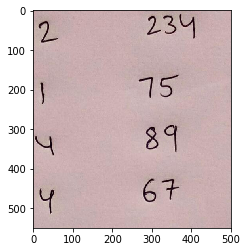

In [105]:

# Load image into variable and display it
img = cv2.imread('5.jpg')
y=470
x=600
h=550
w=500
img = img[y:y+h, x:x+w]
plt.imshow(crop, cmap = plt.get_cmap('gray'))
plt.show()

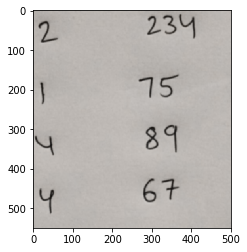

In [106]:
# Blur the grayscale image so that only important edges are extracted and the noisy ones ignored
img_gray_blurred = ndimage.gaussian_filter(img, sigma=1.4) # Note that the value of sigma is image specific so please tune it
plt.imshow(img_gray_blurred, cmap = plt.get_cmap('gray'))
plt.show()

In [107]:
ret,thresh1 = cv2.threshold(img_gray_blurred,131,255,cv2.THRESH_BINARY)
thresh2 = cv2.bitwise_not(thresh1)
    #plt.imshow(thresh2,plt.get_cmap('gray'))
    #plt.title("Interactive Threshold")
    #plt.show()
#interact(thres,Value=(1,255,2))

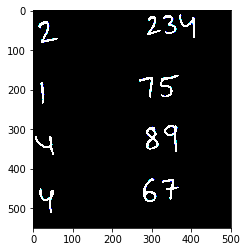

In [108]:
plt.imshow(thresh2)

In [109]:
thresh2[thresh2 != 0] = 255

In [111]:
contours= cv2.findContours(thresh2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [ ]:
cnts = imutils.grab_contours(cnts)
digitCnts = []
 
# loop over the digit area candidates
for c in cnts:
#compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
 
    #if the contour is sufficiently large, it must be a digit
    if w >= 15 and (h >= 30 and h <= 40):
    digitCnts.append(c)

In [ ]:
# sort the contours from left-to-right, then initialize the
# actual digits themselves
digitCnts = contours.sort_contours(digitCnts,method="left-to-right")[0]
digits = []

### Developing CNN model

In [113]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [115]:
data = pd.read_csv('mnist_train.csv')

In [116]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
 #reshaping into 28X28 array
data.iloc[3,1:].values.reshape(28,28).astype('uint8')

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [119]:
#Storing Pixel array in form length width and channel in df_x
df_x = data.iloc[:,1:].values.reshape(len(data),28,28,1)

#Storing the labels in y
y = data.iloc[:,0].values

In [120]:
#Converting labels to categorical features

df_y = keras.utils.to_categorical(y,num_classes=10)

In [121]:
df_x = np.array(df_x)
df_y = np.array(df_y)


In [122]:
#lables
y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [123]:
#categorical labels
df_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [125]:
df_x.shape

(60000, 28, 28, 1)

In [124]:
#test train split

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [126]:
#CNN model
model = Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [127]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total para

In [128]:
#fitting it with just 100 images for testing 

model.fit(x_train,y_train,validation_data=(x_test,y_test))


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 69s 1ms/step - loss: 5.6990 - acc: 0.6377 - val_loss: 1.3724 - val_acc: 0.9058


In [ ]:
model.evaluate(x_test,y_test)

### We can give the input to this model in the form of pixels of digits obtained and predict the digit.